In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import sys
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from pandas_ml_utils.ml.data.extraction import extract_with_post_processor
from pandas_ml_utils.ml.summary import ClassificationSummary
from pandas_ml_utils import FeaturesAndLabels, Model, SkModel
from pandas_ml_quant import pd, np

automatically imported pandas_ml_utils 0.1.0


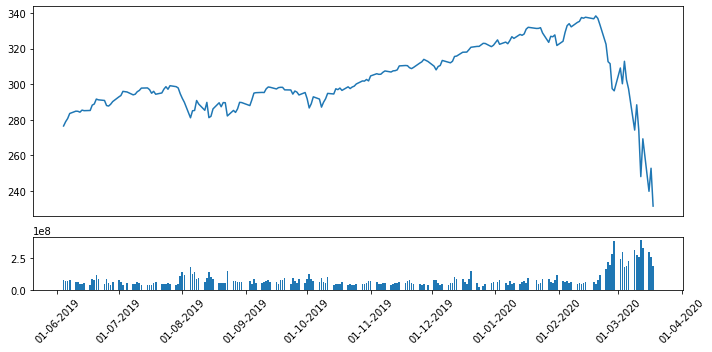

In [2]:
df = pd.fetch_yahoo("SPY")

# NOTE the access to the q_uant property
df[-200:].ta.plot(figsize=(10, 5))()

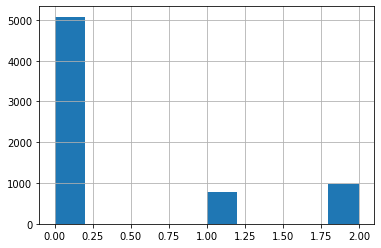

In [3]:
# NOTE all technical analysis starts with the "ta_" prefix
df.ta.opening_gap().hist()

And we want to predict this binary event based on a set of indicators like the RSI (Relative Strength Index) and such.

So we can build up a features and labels definition like so:

In [4]:
fnl = FeaturesAndLabels(
    features=[
        lambda df: df["Close"].ta.macd(),
        lambda df: df["Close"].ta.apo(),
        lambda df: df["Close"].ta.rsi(),
        lambda df: df["Close"].ta.roc(),
        lambda df: df["Close"].ta.trix(),
        lambda df: df["Close"].ta.ppo(),
        lambda df: df["Close"].pct_change().ta.zscore() / 4.,
        lambda df: df["Close"].ta.week_day(),
        lambda df: df["Close"].ta.week(),
        lambda df: df["Close"].ta.up_down_volatility_ratio(),
        lambda df: df.ta.adx(), 
        lambda df: df.ta.atr(),
        lambda df: df.ta.tr(),
        lambda df: df.ta.williams_R(),
        lambda df: df.ta.ultimate_osc(),
        lambda df: df.ta.bop(),
        lambda df: df.ta.cci(),
        lambda df: df.ta.candles_as_culb(relative_close=True),
    ],
    labels=[
        lambda df: df.ta.opening_gap()
    ]
)

# NOTE the df.ml property provides access to (raw) data as it is useful/needed by statistical models
(features, req_samples), labels, targets, weights = df.ML.extract(fnl)
features.describe()

  res = df.rolling(period).apply(lambda c: zscore(c, ddof=ddof)[-1])

  md = tp.rolling(period).apply(lambda x: _np.abs(x - x.mean()).sum() / period)



,"macd_12,26,9","signal_12,26,9","histogram_12,26,9","Close_apo_12,26,0",Close_rsi_14,Close_roc_10,Close_trix_30,"Close_ppo_12,26,1",Close_z_20,dow,...,atr_14,true_range,williams_R_14,"ultimate_osc_7,14,28",bop,cci_14,close,upper,lower,body
count,6701.000000,6701.000000,6701.000000,6701.000000,6701.000000,6701.000000,6701.000000,6701.000000,6701.000000,6701.000000,...,6701.000000,6701.000000,6701.000000,6701.000000,6701.000000,6701.000000,6701.000000,6701.000000,6701.000000,6701.000000
mean,0.002428,0.002455,-0.000027,1.002530,0.549257,0.003957,0.036913,0.002428,-0.007596,0.336766,...,1.493329,1.520418,0.377855,0.546765,0.035727,0.239567,0.000402,0.002915,0.003640,0.000035
std,0.010957,0.010228,0.003365,0.015304,0.113875,0.031587,0.104855,0.010957,0.246444,0.233432,...,0.967341,1.460457,0.301471,0.101953,0.535282,1.052746,0.011799,0.003718,0.004366,0.009715
min,-0.074439,-0.067679,-0.026184,0.891753,0.167987,-0.267695,-0.558651,-0.074439,-0.972346,0.000000,...,0.147346,0.040000,0.000000,0.213749,-1.000000,-3.522097,-0.109424,0.000000,0.000000,-0.089875
25%,-0.002281,-0.001866,-0.001828,0.995333,0.468654,-0.010859,-0.004704,-0.002281,-0.160231,0.166667,...,0.906922,0.750000,0.104977,0.474867,-0.418182,-0.568568,-0.004317,0.000777,0.001120,-0.004165
50%,0.004359,0.004182,-0.000021,1.004710,0.557254,0.006616,0.053165,0.004359,-0.008159,0.333333,...,1.332781,1.200000,0.306748,0.550373,0.053333,0.463470,0.000673,0.001894,0.002506,0.000410
75%,0.009252,0.008945,0.001734,1.011820,0.634055,0.021488,0.100333,0.009252,0.153127,0.500000,...,1.849285,1.860000,0.628466,0.621073,0.500000,1.054928,0.005811,0.003736,0.004728,0.004571
max,0.030255,0.026989,0.018455,1.059521,0.872283,0.215963,0.248463,0.030255,0.839008,0.666667,...,14.134790,31.960000,1.000000,0.846781,1.000000,3.215749,0.145196,0.065180,0.075649,0.092858


Since we have no idea which features are actually "good" to predict the label, we want to do some feature analysis fist.


  res = df.rolling(period).apply(lambda c: zscore(c, ddof=ddof)[-1])

  md = tp.rolling(period).apply(lambda x: _np.abs(x - x.mean()).sum() / period)



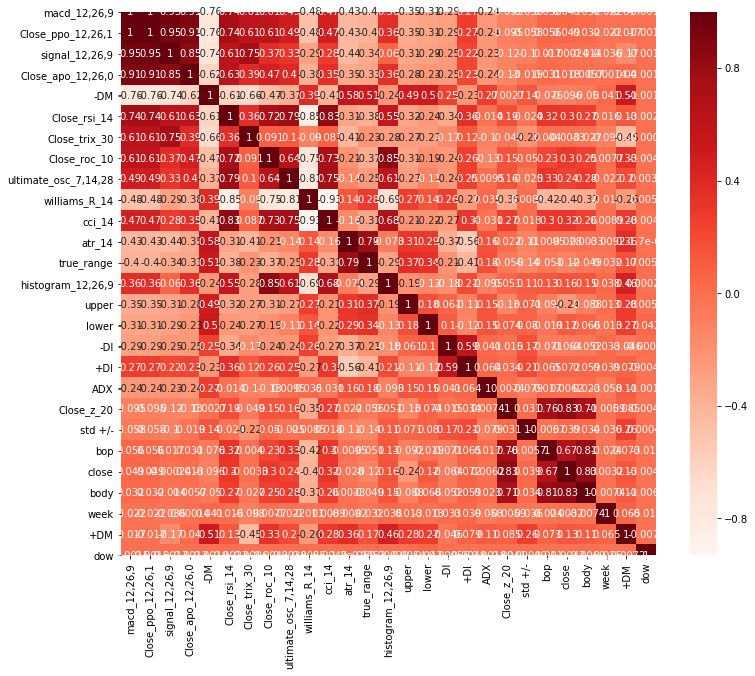

  forest.fit(x, y)



              macd_12,26,9  Close_ppo_12,26,1  signal_12,26,9  \
macd_12,26,9           1.0                1.0        0.951848   

              Close_apo_12,26,0       -DM  Close_rsi_14  Close_trix_30  \
macd_12,26,9           0.906631 -0.762954      0.743968       0.614843   

              Close_roc_10  ultimate_osc_7,14,28  williams_R_14  ...  \
macd_12,26,9      0.605587              0.490548      -0.483709  ...   

                   +DI       ADX  Close_z_20   std +/-       bop     close  \
macd_12,26,9  0.268492 -0.242249   -0.094863 -0.058381  0.056461  0.049251   

                  body      week       +DM       dow  
macd_12,26,9  0.032119 -0.021869 -0.017149 -0.001485  

[1 rows x 27 columns]
label is continuous: True


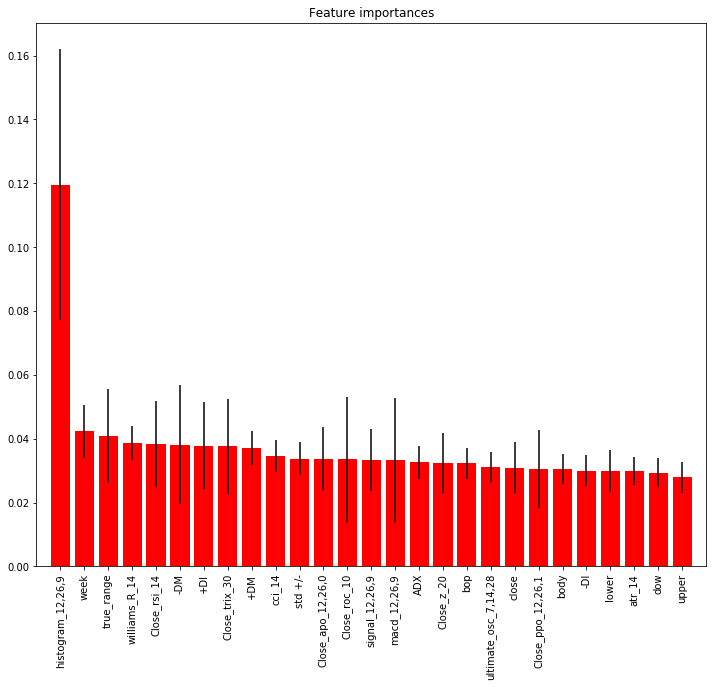

Feature ranking:
['histogram_12,26,9', 'week', 'true_range', 'williams_R_14', 'Close_rsi_14', '-DM', '+DI', 'Close_trix_30', '+DM', 'cci_14', 'std +/-', 'Close_apo_12,26,0', 'Close_roc_10', 'signal_12,26,9', 'macd_12,26,9', 'ADX', 'Close_z_20', 'bop', 'ultimate_osc_7,14,28', 'close', 'Close_ppo_12,26,1', 'body', '-DI', 'lower', 'atr_14', 'dow', 'upper']

TOP 5 features
                   histogram_12,26,9      week  true_range  williams_R_14  \
histogram_12,26,9                1.0  0.038049   -0.294575      -0.689251   

                   Close_rsi_14  
histogram_12,26,9        0.5549  
Features after correlation filer:
              histogram_12,26,9  williams_R_14  Close_rsi_14  true_range  \
macd_12,26,9           0.362931      -0.483709      0.743968   -0.404383   

                  week  
macd_12,26,9 -0.021869  


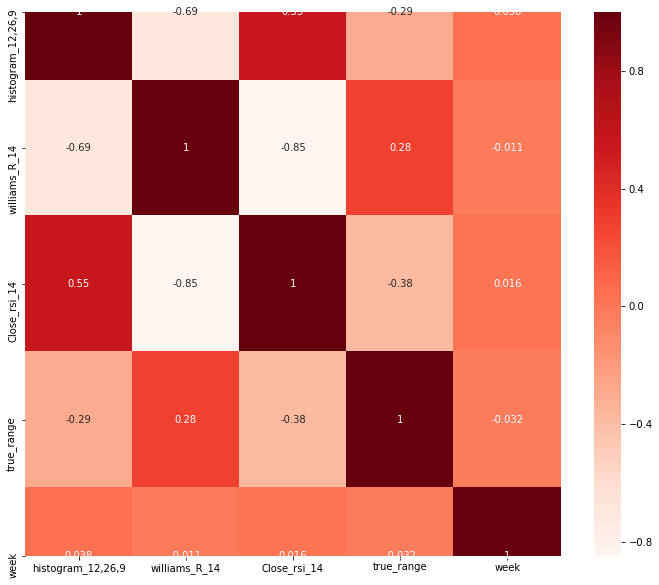

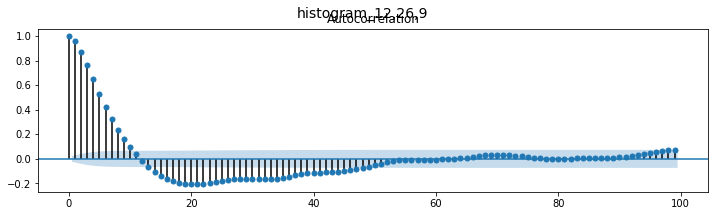

histogram_12,26,9      1.000000
histogram_12,26,9_0    1.000000
histogram_12,26,9_1    0.961218
histogram_12,26,9_2    0.878155
histogram_12,26,9_3    0.771555
histogram_12,26,9_4    0.654483
histogram_12,26,9_5    0.538323
histogram_12,26,9_6    0.429404
histogram_12,26,9_7    0.330022
histogram_12,26,9_8    0.242332
Name: histogram_12,26,9, dtype: float64


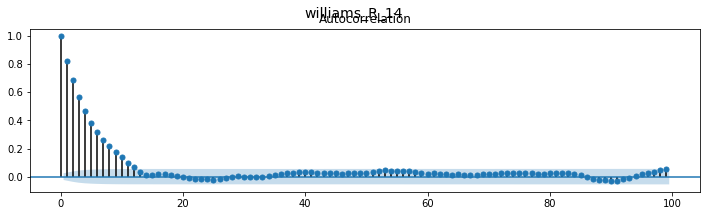

williams_R_14      1.000000
williams_R_14_0    1.000000
williams_R_14_1    0.823824
williams_R_14_2    0.684736
williams_R_14_3    0.564715
williams_R_14_4    0.464921
williams_R_14_5    0.381008
williams_R_14_6    0.315991
williams_R_14_7    0.260937
williams_R_14_8    0.215583
Name: williams_R_14, dtype: float64


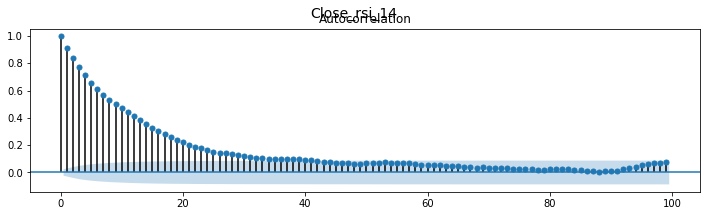

Close_rsi_14      1.000000
Close_rsi_14_0    1.000000
Close_rsi_14_1    0.916254
Close_rsi_14_2    0.841682
Close_rsi_14_3    0.773804
Close_rsi_14_4    0.712836
Close_rsi_14_5    0.658365
Close_rsi_14_6    0.613050
Close_rsi_14_7    0.573214
Close_rsi_14_8    0.536167
Name: Close_rsi_14, dtype: float64


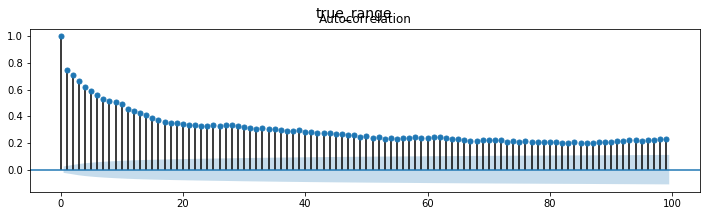

true_range      1.000000
true_range_0    1.000000
true_range_1    0.754262
true_range_2    0.739024
true_range_3    0.704658
true_range_4    0.674277
true_range_5    0.652577
true_range_6    0.624710
true_range_7    0.605066
true_range_8    0.590223
Name: true_range, dtype: float64


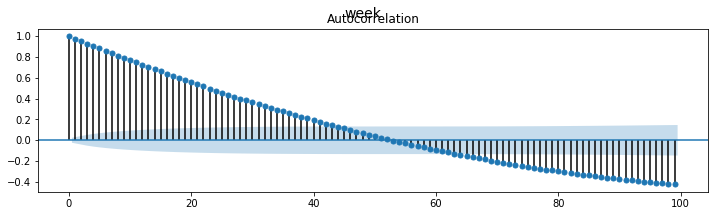

week      1.000000
week_0    1.000000
week_1    0.976226
week_2    0.952447
week_3    0.928665
week_4    0.904911
week_5    0.882443
week_6    0.859591
week_7    0.836735
week_8    0.813873
Name: week, dtype: float64
best lags are
[(1, '-1.00'), (2, '-0.89'), (3, '-0.82'), (4, '-0.75'), (5, '-0.68'), (6, '-0.62'), (7, '-0.57'), (8, '-0.52'), (9, '-0.48'), (10, '-0.44'), (11, '-0.41'), (12, '-0.37'), (13, '-0.34'), (14, '-0.31'), (15, '-0.29'), (16, '-0.27'), (17, '-0.25'), (18, '-0.23'), (19, '-0.22'), (20, '-0.21'), (21, '-0.20'), (22, '-0.19'), (23, '-0.18'), (24, '-0.17'), (25, '-0.17'), (26, '-0.16'), (28, '-0.16'), (27, '-0.16'), (29, '-0.16'), (30, '-0.15'), (31, '-0.14'), (32, '-0.14'), (33, '-0.13'), (34, '-0.13'), (35, '-0.12'), (36, '-0.12'), (37, '-0.12'), (38, '-0.12'), (40, '-0.12'), (39, '-0.12'), (41, '-0.11'), (42, '-0.11'), (43, '-0.10'), (44, '-0.10'), (45, '-0.09'), (46, '-0.09'), (47, '-0.08'), (48, '-0.08'), (49, '-0.08'), (53, '-0.08'), (51, '-0.08'), (52, '-0.08'

In [5]:
features, lags = df.model.feature_selection(fnl, minimum_features=7)

In [6]:
features

['histogram_12,26,9', 'week', 'true_range', 'williams_R_14', 'Close_rsi_14']

In [9]:
from pandas_ml_utils.ml.data.sampeling import KFoldBoostRareEvents, KEquallyWeightEvents
from pandas_ml_common import Constant


fit = df.model.fit(
    SkModel(
        MLPClassifier(activation='tanh', hidden_layer_sizes=(60, 50), random_state=42, alpha=1.1, warm_start=True),
        FeaturesAndLabels(
            features=extract_with_post_processor(
                [
                    lambda df: df["Close"].ta.macd(),
                    #lambda df: df["Close"].ta.apo(),
                    lambda df: df["Close"].ta.rsi(),
                    #lambda df: df["Close"].ta.roc(),
                    #lambda df: df["Close"].ta.trix(),
                    #lambda df: df["Close"].ta.ppo(),
                    #lambda df: df["Close"].pct_change().ta.zscore() / 4.,
                    #lambda df: df["Close"].ta.week_day(),
                    lambda df: df["Close"].ta.week(),
                    #lambda df: df["Close"].ta.up_down_volatility_ratio(),
                    lambda df: df.ta.adx()[["ADX"]], 
                    lambda df: df.ta.atr(),
                    #lambda df: df.ta.tr(),
                    #lambda df: df.ta.williams_R(),
                    #lambda df: df.ta.ultimate_osc(),
                    #lambda df: df.ta.bop(),
                    #lambda df: df.ta.cci(),
                ],
                lambda df: df.ta.rnn(lags)
            ),
            labels=[
                lambda df: df.ta.opening_gap().ta.one_hot_encode_discrete()
            ],
            targets=[
                Constant("None"),
                Constant("Down"),
                Constant("Up"),
            ]
        ),
        summary_provider=ClassificationSummary,
    ),
    test_size=0.4, 
    test_validate_split_seed=42, 
    cross_validation=(1, KEquallyWeightEvents(n_splits=3).split),
)

fit

  resampled_indices = np.hstack(sample_indices_per_label.values())

  % self.max_iter, ConvergenceWarning)



In [11]:
df.model.predict(fit.model, tail=1).map_prediction_to_target()

prediction
2020-03-18 None    0.022097
           Down    0.835216
           Up      0.320720